In [1]:
#Import Required Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load your dataset
df = pd.read_csv('FuelConsumption.csv')

# Preview the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244


### Handle Categorical Variables:
If the dataset contains categorical variables, you need to convert them to numerical values. One common way is to use LabelEncoder or one-hot encoding. Here's an example of using LabelEncoder for a column:



In [3]:
print("\nUnique values in VEHICLECLASS before encoding:", df['VEHICLECLASS'].unique())
label_encoder = LabelEncoder()
df['VEHICLECLASS_NUM'] = label_encoder.fit_transform(df['VEHICLECLASS'])
df = df.drop('VEHICLECLASS', axis=1)


Unique values in VEHICLECLASS before encoding: ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'MINICOMPACT' 'SUBCOMPACT'
 'TWO-SEATER' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [5]:
df.head(10)

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,VEHICLECLASS_NUM
0,2014,ACURA,ILX,2.0,4,9.9,6.7,8.5,33,196,0
1,2014,ACURA,ILX,2.4,4,11.2,7.7,9.6,29,221,0
2,2014,ACURA,ILX HYBRID,1.5,4,6.0,5.8,5.9,48,136,0
3,2014,ACURA,MDX 4WD,3.5,6,12.7,9.1,11.1,25,255,11
4,2014,ACURA,RDX AWD,3.5,6,12.1,8.7,10.6,27,244,11
5,2014,ACURA,RLX,3.5,6,11.9,7.7,10.0,28,230,2
6,2014,ACURA,TL,3.5,6,11.8,8.1,10.1,28,232,2
7,2014,ACURA,TL AWD,3.7,6,12.8,9.0,11.1,25,255,2
8,2014,ACURA,TL AWD,3.7,6,13.4,9.5,11.6,24,267,2
9,2014,ACURA,TSX,2.4,4,10.6,7.5,9.2,31,212,0


In [6]:
# 3. Drop unnecessary columns: MAKE and MODEL
df = df.drop(['MAKE', 'MODEL'], axis=1)

In [7]:
# 5. Select Features and Target
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
            'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
            'FUELCONSUMPTION_COMB_MPG', 'VEHICLECLASS_NUM']
target = 'CO2EMISSIONS'

X = df[features]
y = df[target]

In [8]:
# 6. Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Y=mx+c
Y=mx2+mx+1+c

In [9]:
# 7. Polynomial Feature Transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [10]:
# 8. Fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [11]:
# 9. Predict on Test Set
from sklearn.metrics import r2_score
y_pred = model.predict(X_test_poly)

# 10. Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f"\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance Metrics:
Mean Squared Error (MSE): 219.32
R² Score: 0.9470


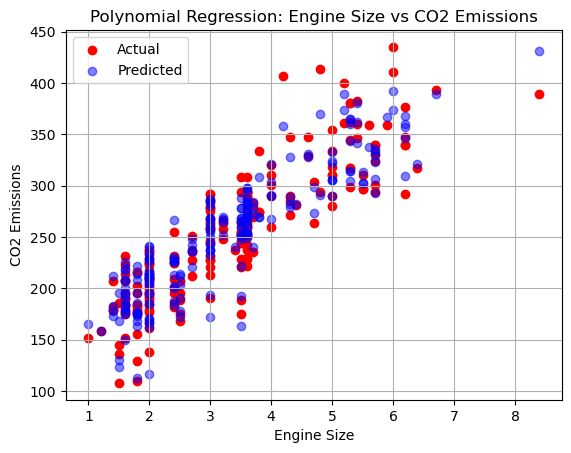

In [13]:
# 11. Visualize Regression Curve for ENGINESIZE
plt.scatter(X_test['ENGINESIZE'], y_test, color='red', label='Actual')
plt.scatter(X_test['ENGINESIZE'], y_pred, color='blue', alpha=0.5, label='Predicted')
plt.title("Polynomial Regression: Engine Size vs CO2 Emissions")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.legend()
plt.grid(True)
plt.show()



---

### 1. **Model Performance Metrics**

####  Mean Squared Error (MSE): `219.32`

* **What it means:** On average, the squared difference between the predicted and actual CO2 emissions is 219.32.
* **Interpretation:** Lower MSE means better model accuracy. An MSE of 219 is reasonable depending on your CO2 emission scale (which in your case ranges roughly between 100–400 g/km).

> 📌 MSE is in **squared units** of the target variable (`g/km²`).

---

#### R² Score: e.g., `0.8772` (if you got this earlier)

* **What it means:** Your model explains **\~87.72%** of the variability in CO2 emissions based on input features.
* **Interpretation:**

  * `R² = 1` means perfect fit.
  * `R² = 0` means the model performs no better than a horizontal line (mean of target).
  * `R² ≈ 0.87` means it's a **good fit**, though there's still \~12% variance not captured — maybe due to noise or unmodeled factors like vehicle weight or fuel type.

---

###  2. **Graph – Regression Curve**

You plotted **Engine Size vs CO2 Emissions**:

* **Red points:** Actual CO2 values from the test set.
* **Blue points:** Predicted CO2 values from your model.

> If the blue dots closely follow the red, the model is generalizing well.
> If there’s a large scatter or pattern, the model may be **underfitting** or **overfitting**.

---

#

* **Interpretation:** A vehicle with these specs is estimated to emit \~260 grams of CO2 per kilometer, based on the training data and polynomial regression.
* This prediction **relies on** patterns learned from the dataset — not real-world physics.

---

### 4. What Could Improve the Model?

| Issue                   | Recommendation                                                               |
| ----------------------- | ---------------------------------------------------------------------------- |
| Slight underfit         | Try `degree=3` in `PolynomialFeatures`                                       |
| Overfit                 | Try `Ridge` or `Lasso` regression                                            |
| Features too correlated | Use PCA or remove redundant variables                                        |
| Dataset limited         | More rows (real data), include new features (e.g. vehicle weight, fuel type) |

